# Introduction
I am trying to gain experience and improve day by day in analysis and model training. This was my aim while preparing this notebook.
What's in this notebook?

1. Explorating and visualising the data with pandas and seaborn packages
2. Building regression models to get some stable results with sklearn.

### Data Set Information:
This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

Attribute Information:
1. mpg: continuous 
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
!ls

Untitled.ipynb
auto-mpg.csv


In [3]:
#function to load the data
def load_data(path):
    return pd.read_csv(path)

In [4]:
#call function to load the data
mpg=load_data("auto-mpg.csv")

In [5]:
#make copy of original dataset
data=mpg.copy()

In [173]:
# Check the shape of dataset
data.shape

(398, 8)

this dataset has 9 features with 398 rows.

In [7]:
# Head of dataset
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


in this daatset car name and car brand are in one feature. So to check more insights in this we need todo feature engineering to this dataset. So we do feature extraction to split the car name feature into car name and car brand.

In [8]:
#Split the car name into brand and model
car_name=[]
car_model=[]
for i in data['car name']:
    car_name.append(i.split()[0])
    car_model.append(i.split(None,1)[1:])
    

In [9]:
data['car_name']=car_name
data['car_model']=car_model

In [10]:
data=data.drop(['car name'], axis=1)

In [11]:
data['car_model']=data['car_model'].astype(str)
data.loc[data.car_model.notna().index,'car_model'] = data.car_model[data.car_model.notna()].apply(lambda x: re.sub('[\W_]+','',x))


In [12]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,car_model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet,chevellemalibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick,skylark320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc,rebelsst
4,17.0,8,302.0,140,3449,10.5,70,1,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford,mustanggl
394,44.0,4,97.0,52,2130,24.6,82,2,vw,pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford,ranger


In [13]:
#info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
 9   car_model     398 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


as we notice that features are int, float and object types

In [14]:
#description of data
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


we can analyze that mostly data of mpg features are scattered arounf 7.8 and the average weight of cars is 2970

In [15]:
#Check null  values
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car_name        0
car_model       0
dtype: int64

there is no null value in this dataset.

In [16]:
# here are not any null values but can be space variable
(data == "?").sum()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
car_model       0
dtype: int64

Here we notice that horsepower feaures ahs some blank space so we need to fix it.

In [17]:
#replace space value with null values
data["horsepower"] = data["horsepower"].replace("?", np.NaN).astype("float64")

In [18]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
car_model       0
dtype: int64

after replce spce value with nan, we see horse power has 6 null values. I donnt want to fix it randomely so we first check the corr of horsepower feature with other features,

In [19]:
data_corr=data.corr().abs().unstack().sort_values(kind = "quiksort", ascending = False).reset_index()

data_corr.rename(columns = {"level_0": "Feature A",
                            "level_1": "Feature B",
                            0:"Correlation Coefs."}, inplace = True)

data_corr[data_corr["Feature A"] == "horsepower"].style.background_gradient(cmap = "coolwarm")

,Feature A,Feature B,Correlation Coefs.
4,horsepower,horsepower,1.000000
12,horsepower,displacement,0.897257
16,horsepower,weight,0.864538
19,horsepower,cylinders,0.842983
25,horsepower,mpg,0.778427
28,horsepower,acceleration,0.689196
45,horsepower,origin,0.455171
50,horsepower,model year,0.416361


we analyse that thsi feature has high correlation with displacement. 

In [20]:
data.groupby(['displacement'], sort = False)["horsepower"].apply(lambda x: x.fillna(x.mean()))
data['horsepower'] = data.groupby(['cylinders'], sort=False)['horsepower'].apply(lambda x: x.fillna(x.mean()))

## Data Visualization

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


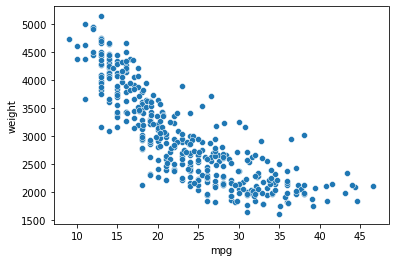

In [21]:
sns.scatterplot('mpg','weight', data=data)

we can analysis that as weight decreases, mpg increases. So lighter weight car give more mpg. 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


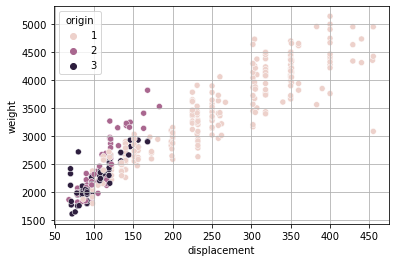

In [22]:
sns.scatterplot('displacement', 'weight', data=data, hue='origin')
plt.grid()
plt.show()

we can analyse that as heavy weight car can move more rather than light weight car for origin 1 i.e. some car who are 5000 in weight can move 400-450 displacment unit. for origin 3 we can anlyze that some cars those are in 1600 to 2500 in weight can move 70 to 120 displacement

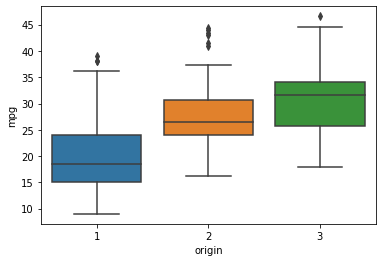

In [23]:
sns.boxplot(x='origin', y='mpg', data=data)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


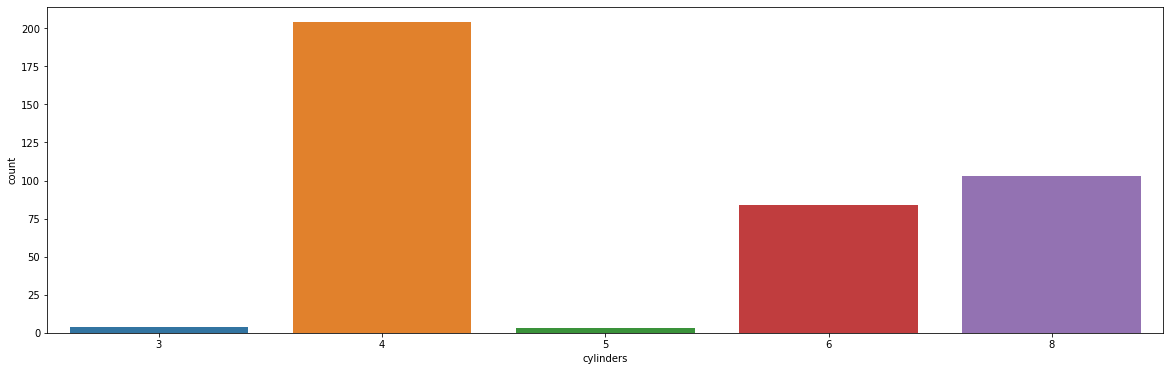

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(data['cylinders'])
plt.show()


mostly cars are with 4 cylinders.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


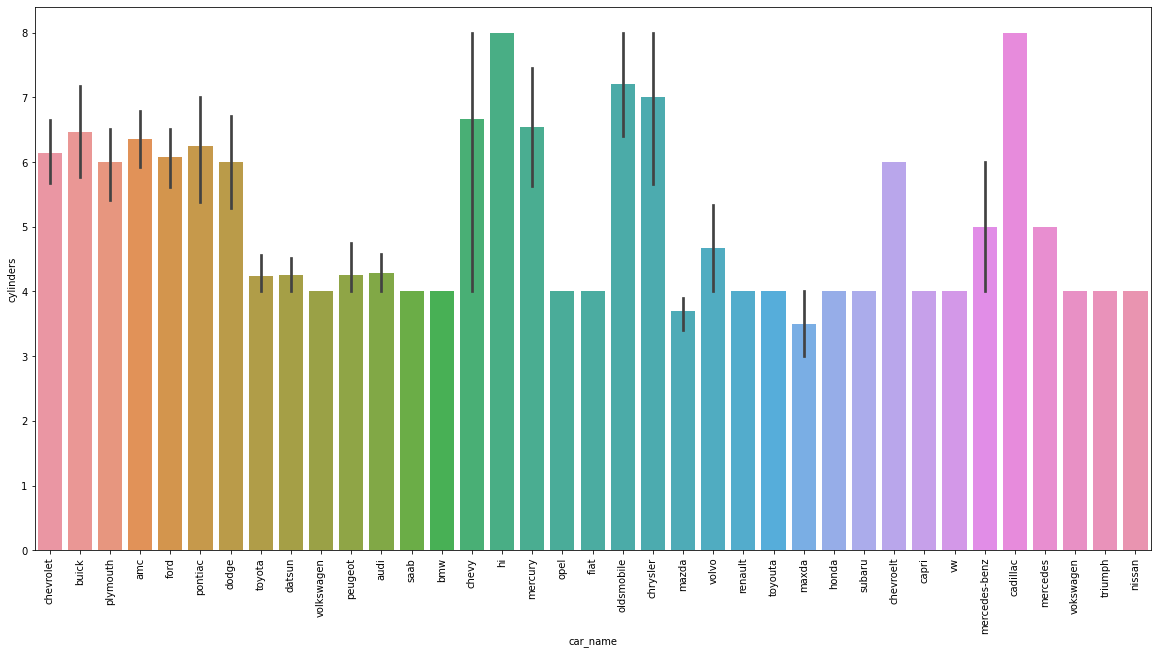

In [25]:
plt.figure(figsize=(20,10))
sns.barplot('car_name','cylinders', data=data)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


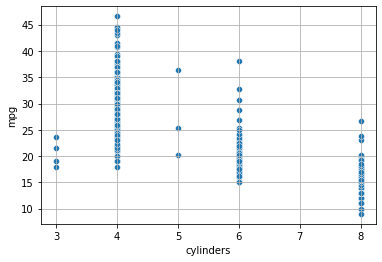

In [26]:
sns.scatterplot( 'cylinders','mpg', data=data)
plt.grid()
plt.show()

we can analyse that those cars has 4 cylinder is great in mileage.and mostly cars have 4 cylinders, very few cars have 5 cylinder which are good mileage but cars with 8 cylinders gives low mileage.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


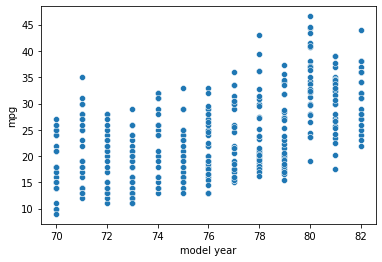

In [27]:
sns.scatterplot('model year','mpg',data=data)
plt.show()

77-82 years model are given high mileage, model of 71 year model also give good mileage. model of year 78,80 and 82 gives higher mileage.

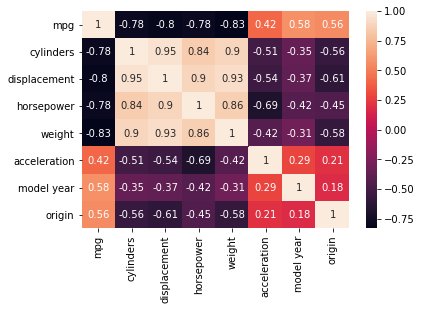

In [28]:
sns.heatmap(data.corr(), annot=True)
plt.show()

target features mpg has strong correlation with displacement, weight, cylinders features.

In [29]:
data=data.drop(['car_name', 'car_model'], axis=1)

we can predict better model after removing these two features car_name, car_model.

In [30]:
features=data.drop(['mpg'], axis=1)
label=data['mpg'].copy()

# Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(features, label, test_size=0.2, random_state=42)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [35]:
lr.fit(train_x, train_y)

LinearRegression()

In [37]:
pred_train=lr.predict(train_x)

In [38]:
pred_test=lr.predict(test_x)

In [42]:
pred_train[:10]

array([15.15668885, 25.28488962, 35.94369974, 34.28903526, 24.31625519,
       11.37192142, 33.1622253 , 30.3962697 , 26.94162938,  8.40753713])

In [43]:
pred_test[:10]

array([32.90162366, 29.52650099, 21.38988233, 16.78804271, 12.49514894,
       27.19593614, 27.87687512,  9.74165417, 16.88482014, 21.91256317])

In [45]:
train_y.to_numpy()[:10]

array([16. , 27. , 37. , 36.1, 23. , 14. , 32.8, 29.9, 20. , 12. ])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
print('Mean Absolute Error: ', mean_absolute_error(train_y, pred_train))
print('Mean Squared Error: ', mean_squared_error(train_y, pred_train))
print('Root Mean Squared Error: ', np.sqrt(mean_absolute_error(train_y, pred_train)))

Mean Absolute Error:  2.5979578115956183
Mean Squared Error:  11.655072409197517
Root Mean Squared Error:  1.6118181695202527


In [136]:
from sklearn.metrics import r2_score
r2_lr=r2_score(train_y, pred_train)
print("Accuracy: ", r2_lr*100)

Accuracy:  81.41024777574724


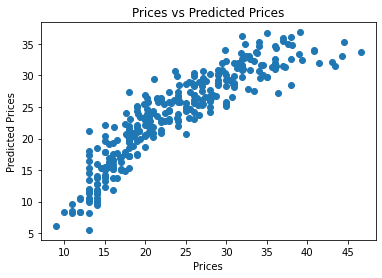

In [51]:
plt.scatter(train_y, pred_train)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

# Ridge Regression

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [62]:
rg_lin=Ridge(alpha=1, solver='cholesky')
parameters={'alpha': [1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(rg_lin,parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Ridge(alpha=1, solver='cholesky'),
             param_grid={'alpha': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-12.256594190804016


ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. The parameter is 1 and best score is 12.25. 

In [135]:
pred_ridge=ridge_regressor.predict(train_x)
r2_ridge=r2_score(train_y, pred_ridge)
print("Accuracy: ", r2_ridge*100)

Accuracy:  81.40323189099763


# Lasso Regression

In [89]:
from sklearn.linear_model import Lasso

In [90]:
ls_lin=Lasso()
parameters={'alpha':[1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor=GridSearchCV(ls_lin, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [91]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-13.899372861098978


In [102]:
ls=Lasso(alpha=0.001)
ls.fit(train_x, train_y)

Lasso(alpha=0.001)

In [116]:
ls_score=ls.score(train_x, train_y)
ls_score_test=ls.score(test_x, test_y)

In [108]:
coeff_used=np.sum(ls.coef_!=0)

In [122]:
ls_001=ls_lin.score(train_x, train_y)
ls_001_test=ls_lin.score(test_x, test_y)

In [114]:
coeff=np.sum(ls_lin.coef_!=0)

In [123]:
print("training score for alpha=0.0001:", ls_score )
print("test score for alpha=0.0001:", ls_score_test )
print ("number of features used: for alpha =0.0001:", coeff_used)

print("training score for alpha=1:", ls_001)
print("test score for alpha=1:", ls_001_test )
print("number of features used: for alpha =0.0001:", coeff)

training score for alpha=0.0001: 0.8141009076849436
test score for alpha=0.0001: 0.8474294380793667
number of features used: for alpha =0.0001: 7
training score for alpha=1: 0.783453928309565
test score for alpha=1: 0.8383990613414276
number of features used: for alpha =0.0001: 4


The default value of regularization parameter in Lasso is 1(alpha =1). with this, out of 8 features 4 features are used.
We can analyse that both train and test score are low in case of alpha=1, so model underfitting this dataset.
Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.001, non-zero features =7, training and test score increases.

In [134]:
pred_lasso=ls_lin.predict(train_x)
r2_lasso=r2_score(train_y, pred_lasso)
print("Accuracy: ", r2_lasso*100)

Accuracy:  78.3453928309565


# Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
rand_for=RandomForestRegressor()

In [131]:
rand_for.fit(train_x, train_y)

RandomForestRegressor()

In [132]:
rand_pred=rand_for.predict(train_x)

In [133]:
print('Mean Absolute Error: ', mean_absolute_error(train_y, rand_pred))
print('Mean Squared Error: ', mean_squared_error(train_y, rand_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_absolute_error(train_y, rand_pred)))

Mean Absolute Error:  0.7402830188679245
Mean Squared Error:  1.1362184402515727
Root Mean Squared Error:  0.8603970123541367


In [137]:
r2_rand=r2_score(train_y, pred_lasso)
print("Accuracy: ", r2_rand*100)

Accuracy:  78.3453928309565


In [139]:
model_names = ["LINEAR","RIDGE","LASSO","Random forest"]

models = {"Model":model_names,
          "R2 SCORE":[r2_lr, r2_ridge, r2_lasso,r2_rand]}

model_performance = pd.DataFrame(models)

model_performance.sort_values(by = "R2 SCORE",kind='quicksort', ascending=True).style.background_gradient(cmap='summer')

,Model,R2 SCORE
2,LASSO,0.783454
3,Random forest,0.783454
1,RIDGE,0.814032
0,LINEAR,0.814102


the above shows the r2 score of each models. Ridge and Linear model have same accuracy. Our model accuracy is 81% 

### Evaluation the model on Test Data

In [164]:
final_model = grid_search.best_estimator_

In [165]:
test_x

array([[-0.85051483, -0.98134964, -1.34342095, -1.39881183,  0.63795339,
        -0.02884597,  1.73836775],
       [-0.85051483, -0.69930815, -0.64331887, -0.40988656,  1.07290607,
         1.63897537, -0.72949361],
       [ 0.33833667,  0.38995555, -0.07785181, -0.39916327, -0.9568731 ,
        -1.41869708, -0.72949361],
       [ 1.52718818,  1.22635446,  1.26849834,  1.15690469, -0.88438099,
        -0.02884597, -0.72949361],
       [ 1.52718818,  1.22635446,  1.26849834,  1.51077313, -0.41318225,
        -0.86275663, -0.72949361],
       [-0.85051483, -0.92299623, -0.40097585, -1.03541158,  0.31173888,
        -1.14072686,  1.73836775],
       [-0.85051483, -0.50479678, -0.29326784, -0.12393226,  0.27549283,
         1.63897537, -0.72949361],
       [ 1.52718818,  2.41287384,  3.01875354,  2.10412829, -1.68179423,
        -0.86275663, -0.72949361],
       [ 1.52718818,  0.66227147,  0.19141822,  1.29988184,  1.2178903 ,
         0.24912426, -0.72949361],
       [ 0.33833667,  0.0787

In [166]:
test_y

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
249    19.9
225    17.5
367    28.0
175    29.0
285    17.0
Name: mpg, Length: 80, dtype: float64

In [167]:
final_predictions = final_model.predict(test_x)

In [170]:
final_mse = mean_squared_error(test_y, final_predictions)

In [171]:
final_rmse = np.sqrt(final_mse)

In [172]:
print("Generalization Error: ", final_rmse)

Generalization Error:  2.2596851120356467
